In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [4]:
numerical_data=df[['Age','Blood Pressure','Cholesterol Levels','Heart Rate','BMI','Diagnosis']]
numerical_data.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis
0,65,130,250,72,28.0,Hypertension with high cholesterol.
1,42,110,150,76,24.0,Pre-hypertension.
2,58,140,200,80,30.0,Type 2 Diabetes.
3,71,160,220,88,32.0,Heart Failure.
4,35,120,180,74,27.0,Overweight.


(array([ 5.,  9., 11.,  9., 15., 12., 11., 10.,  9.,  9.]),
 array([25., 30., 35., 40., 45., 50., 55., 60., 65., 70., 75.]),
 <BarContainer object of 10 artists>)

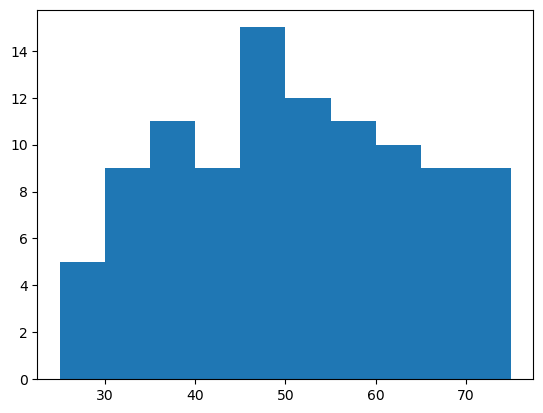

In [5]:
plt.hist(numerical_data['Age'])

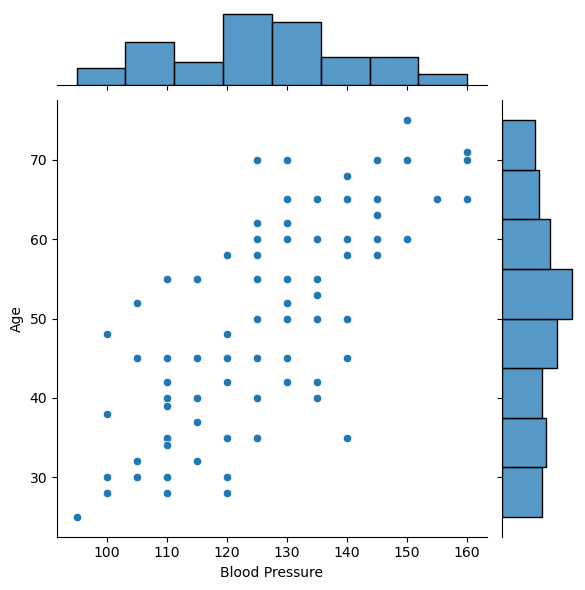

In [6]:
sb.jointplot(data=numerical_data,x='Blood Pressure',y='Age')

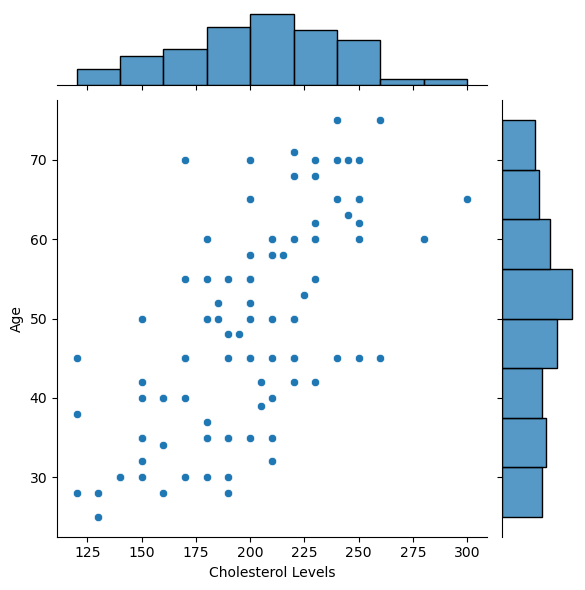

In [7]:
sb.jointplot(data=numerical_data,x='Cholesterol Levels',y='Age')

In [8]:
numerical_data['Diagnosis']=numerical_data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_1080\3582457174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Diagnosis']=numerical_data['Diagnosis'].apply(


In [9]:
print(numerical_data['Diagnosis'].value_counts())

Diagnosis
0    69
1    31
Name: count, dtype: int64


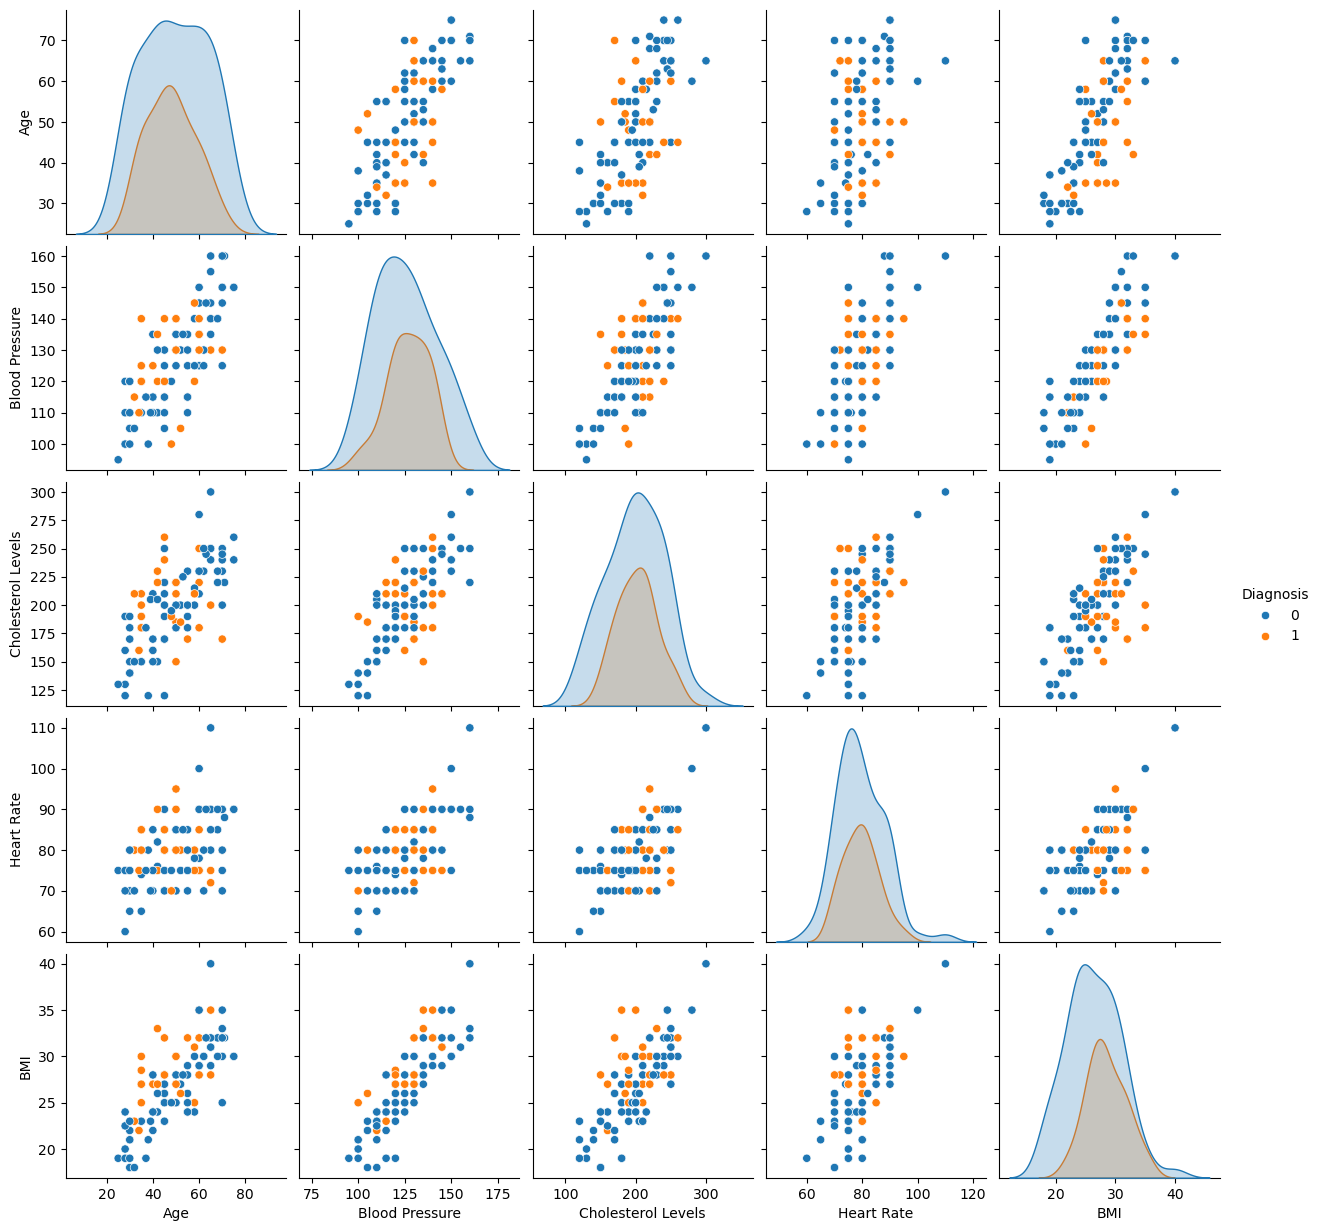

In [10]:
sb.pairplot(numerical_data,hue='Diagnosis')

In [11]:
X=numerical_data.drop('Diagnosis',axis=1)
Y=numerical_data['Diagnosis']

In [12]:
X

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
0,65,130,250,72,28.0
1,42,110,150,76,24.0
2,58,140,200,80,30.0
3,71,160,220,88,32.0
4,35,120,180,74,27.0
...,...,...,...,...,...
95,45,140,260,85,32.0
96,70,125,200,70,25.0
97,55,115,180,80,24.0
98,30,120,190,75,23.0


In [13]:
Y

0     1
1     0
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    0
99    1
Name: Diagnosis, Length: 100, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)


In [15]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [16]:
log.coef_

array([[-0.11869886, -0.06573703,  0.00548854, -0.10168701,  0.74212232]])

In [17]:
y_pred=log.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.50      0.40      0.44         5

    accuracy                           0.75        20
   macro avg       0.66      0.63      0.64        20
weighted avg       0.73      0.75      0.74        20



In [22]:
print(confusion_matrix(y_test,y_pred))

[[13  2]
 [ 3  2]]
